<a href="https://colab.research.google.com/github/aravind2608/aravind/blob/master/CNN_for_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Activation, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
DATADIR=('/content/drive/MyDrive/Dataset_BUSI_with_GT/Train')
#test=('F:\\Dataset\\train')
CATEGORIES=["benign","malignant","normal"]

In [6]:
training_data=[]

for category in CATEGORIES:
  path=os.path.join(DATADIR, category)
  class_num=CATEGORIES.index(category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path, img),cv2.IMREAD_COLOR)
    new_array=cv2.resize(img_array,(150,150))
    training_data.append([new_array, class_num])
    #Y.append([class_num])


In [7]:
import random
import numpy as np
random.shuffle(training_data)
X=[]
Y=[]
for features, labels in training_data:
  X.append(features)
  Y.append(labels)
X=np.array([X]).reshape(-1, 150,150, 3)
Y=np.array([Y]).reshape(1578)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,Y,test_size=0.20,stratify = Y, random_state=24)

In [9]:
X_train=X_train/255
X_val=X_val/255

In [11]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [47]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 100)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 100)       90100     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 100)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 100)       90100     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 100)     

In [16]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, batch_size = 20, epochs = 10,validation_data = (X_val, y_val))

Epoch 1/10
64/64 [==============================] - 157s 2s/step - loss: 0.2989 - accuracy: 0.8756 - val_loss: 0.5669 - val_accuracy: 0.7975
Epoch 2/10
64/64 [==============================] - 154s 2s/step - loss: 0.2388 - accuracy: 0.9065 - val_loss: 0.5665 - val_accuracy: 0.7690
Epoch 3/10
64/64 [==============================] - 154s 2s/step - loss: 0.2265 - accuracy: 0.9097 - val_loss: 0.5377 - val_accuracy: 0.8323
Epoch 4/10
64/64 [==============================] - 154s 2s/step - loss: 0.1693 - accuracy: 0.9287 - val_loss: 0.6160 - val_accuracy: 0.8259
Epoch 5/10
64/64 [==============================] - 154s 2s/step - loss: 0.1869 - accuracy: 0.9319 - val_loss: 0.7294 - val_accuracy: 0.8165
Epoch 6/10
64/64 [==============================] - 154s 2s/step - loss: 0.1864 - accuracy: 0.9311 - val_loss: 0.7273 - val_accuracy: 0.8101
Epoch 7/10
64/64 [==============================] - 157s 2s/step - loss: 0.1219 - accuracy: 0.9509 - val_loss: 0.7650 - val_accuracy: 0.7880
Epoch 8/10
64

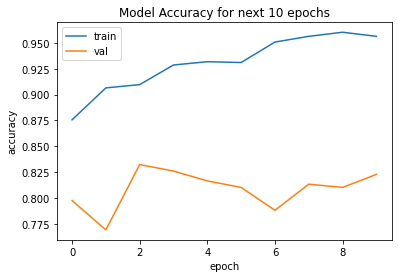

In [49]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for next 10 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

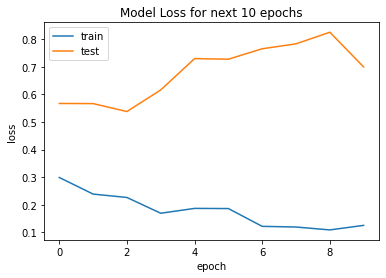

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for next 10 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
print(history.history)

{'loss': [0.2988739609718323, 0.23876048624515533, 0.226454496383667, 0.16934950649738312, 0.18692633509635925, 0.1863510012626648, 0.1219210997223854, 0.11950425803661346, 0.10899556428194046, 0.12548823654651642], 'accuracy': [0.8755943179130554, 0.906497597694397, 0.9096671938896179, 0.928684651851654, 0.9318541884422302, 0.9310618042945862, 0.9508716464042664, 0.9564183950424194, 0.9603803753852844, 0.9564183950424194], 'val_loss': [0.5668864250183105, 0.5664752721786499, 0.5377089381217957, 0.6160048246383667, 0.7294250726699829, 0.7272650003433228, 0.7650282382965088, 0.7828948497772217, 0.8248814344406128, 0.6991597414016724], 'val_accuracy': [0.797468364238739, 0.7689873576164246, 0.8322784900665283, 0.8259493708610535, 0.8164557218551636, 0.8101266026496887, 0.7879746556282043, 0.8132911324501038, 0.8101266026496887, 0.8227847814559937]}


In [52]:
model.evaluate(X_val, y_val)

10/10 [==============================] - 10s 1s/step - loss: 0.6992 - accuracy: 0.8228


[0.6991598606109619, 0.8227847814559937]

In [53]:
model.save("/content/drive/MyDrive/UV_acc.h5")